# RL Algorithms Comparism

## Importing the visualization libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Structuring the files per scenario so they can be merged together

In [2]:
scen1_file_lists = ['ft_uniform_traffic_test_data.csv', 'dqn_uniform_traffic_test_data.csv', 'sarsa_uniform_traffic_test_data.csv', 'a2c_uniform_traffic_test_data.csv']
# scen2_file_lists = ['ft_heavy_traffic_NS_test_data.csv', 'dqn_heavy_traffic_NS_test_data.csv', 'sarsa_heavy_traffic_NS_test_data.csv', 'a2c_heavy_traffic_NS_test_data.csv']
# scen3_file_lists = ['ft_heavy_traffic_WE_test_data.csv', 'dqn_heavy_traffic_WE_test_data.csv', 'sarsa_heavy_traffic_WE_test_data.csv', 'a2c_heavy_traffic_WE_test_data.csv']

## Load the files into dataframes per scenario

In [3]:
method_names = ['Fixed Time', 'DQN', 'SARSA', 'A2C']  # Names to use for renaming columns

# Load and rename the 'Avg Waiting Time' column uniquely
scen1_dfs = [pd.read_csv(file).rename(columns={'Average Queue length': f'Avg Queue Length ({method})', 'Total Queue Length': f'Total Queue Length ({method})'}) 
       for file, method in zip(scen1_file_lists, method_names)]

# scen2_dfs = [pd.read_csv(file).rename(columns={'Average Queue length': f'Avg Queue Length ({method})', 'Total Queue Length': f'Total Queue Length ({method})'}) 
#        for file, method in zip(scen2_file_lists, method_names)]

# scen3_dfs = [pd.read_csv(file).rename(columns={'Average Queue length': f'Avg Queue Length ({method})', 'Total Queue Length': f'Total Queue Length ({method})'}) 
#        for file, method in zip(scen3_file_lists, method_names)]

In [4]:
for df in scen1_dfs:
    df.drop(['Phase', 'Action', 'Reward'], axis=1, inplace=True)

In [5]:
for df in scen2_dfs:
    df.drop(['Phase', 'Action', 'Reward'], axis=1, inplace=True)

In [6]:
for df in scen3_dfs:
    df.drop(['Phase', 'Action', 'Reward'], axis=1, inplace=True)

In [7]:
scen1_dfs = [df.assign(Step = df['Step'] * 2000) for df in scen1_dfs]

In [8]:
scen2_dfs = [df.assign(Step = df['Step'] * 2000) for df in scen2_dfs]

In [9]:
scen3_dfs = [df.assign(Step = df['Step'] * 2000) for df in scen3_dfs]

## Merge the scenarios together by column

In [10]:
scen1_df = scen1_dfs[0]
for df in scen1_dfs[1:]:
    scen1_df = scen1_df.merge(df, on="Step", how="outer")

In [11]:
scen2_df = scen2_dfs[0]
for df in scen2_dfs[1:]:
    scen2_df = scen2_df.merge(df, on="Step", how="outer")

In [12]:
scen3_df = scen3_dfs[0]
for df in scen3_dfs[1:]:
    scen3_df = scen3_df.merge(df, on="Step", how="outer")

In [13]:
scen1_df

,Avg Queue Length (Fixed Time),Step,Total Queue Length (Fixed Time),Avg Queue Length (DQN),Total Queue Length (DQN),Avg Queue Length (SARSA),Total Queue Length (SARSA),Avg Queue Length (A2C),Total Queue Length (A2C)
0,0.000,0.5,0,0.000,0,0.000,0,0.000,0
1,0.100,1.0,4,0.100,4,0.100,4,0.100,4
2,0.000,1.5,0,0.000,0,0.000,0,0.000,0
3,0.000,2.0,0,0.000,0,0.000,0,0.000,0
4,0.050,2.5,2,0.050,2,0.050,2,0.050,2
...,...,...,...,...,...,...,...,...,...
1995,0.125,998.0,5,0.050,2,0.150,6,0.000,0
1996,0.125,998.5,5,0.025,1,0.150,6,0.025,1
1997,0.125,999.0,5,0.000,0,0.125,5,0.000,0
1998,0.125,999.5,5,0.000,0,0.125,5,0.000,0


In [14]:
scen2_df

,Avg Queue Length (Fixed Time),Step,Total Queue Length (Fixed Time),Avg Queue Length (DQN),Total Queue Length (DQN),Avg Queue Length (SARSA),Total Queue Length (SARSA),Avg Queue Length (A2C),Total Queue Length (A2C)
0,0.000,0.5,0,0.000,0,0.000,0,0.000,0
1,0.100,1.0,4,0.100,4,0.100,4,0.100,4
2,0.000,1.5,0,0.000,0,0.000,0,0.000,0
3,0.000,2.0,0,0.000,0,0.000,0,0.000,0
4,0.050,2.5,2,0.050,2,0.050,2,0.050,2
...,...,...,...,...,...,...,...,...,...
1995,0.425,998.0,17,0.725,29,0.500,20,0.250,10
1996,0.375,998.5,15,0.750,30,0.475,19,0.325,13
1997,0.350,999.0,14,0.675,27,0.550,22,0.275,11
1998,0.350,999.5,14,0.625,25,0.575,23,0.150,6


In [15]:
scen3_df

,Avg Queue Length (Fixed Time),Step,Total Queue Length (Fixed Time),Avg Queue Length (DQN),Total Queue Length (DQN),Avg Queue Length (SARSA),Total Queue Length (SARSA),Avg Queue Length (A2C),Total Queue Length (A2C)
0,0.000,0.5,0,0.000,0,0.000,0,0.000,0
1,0.100,1.0,4,0.100,4,0.100,4,0.100,4
2,0.000,1.5,0,0.000,0,0.000,0,0.000,0
3,0.000,2.0,0,0.000,0,0.000,0,0.000,0
4,0.050,2.5,2,0.050,2,0.050,2,0.050,2
...,...,...,...,...,...,...,...,...,...
1995,0.500,998.0,20,0.125,5,0.500,20,0.350,14
1996,0.500,998.5,20,0.200,8,0.450,18,0.325,13
1997,0.575,999.0,23,0.200,8,0.475,19,0.350,14
1998,0.575,999.5,23,0.225,9,0.450,18,0.300,12


## Plotting the data for Scenario 1

### Plot all model results together

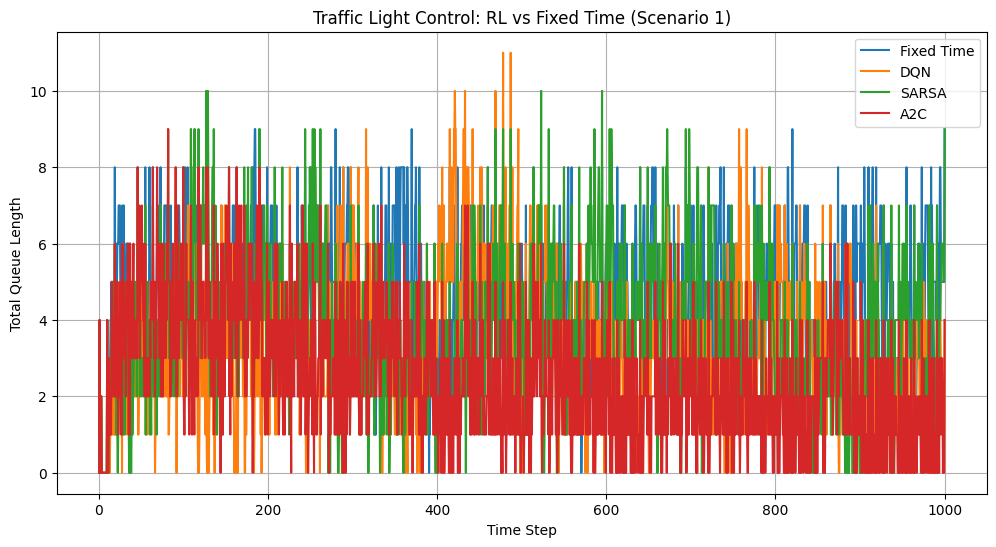

In [16]:
plt.figure(figsize=(12, 6))
for method in method_names:
    plt.plot(scen1_df["Step"], scen1_df[f"Total Queue Length ({method})"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("Traffic Light Control: RL vs Fixed Time (Scenario 1)")
plt.legend()
plt.grid(True)
plt.show()

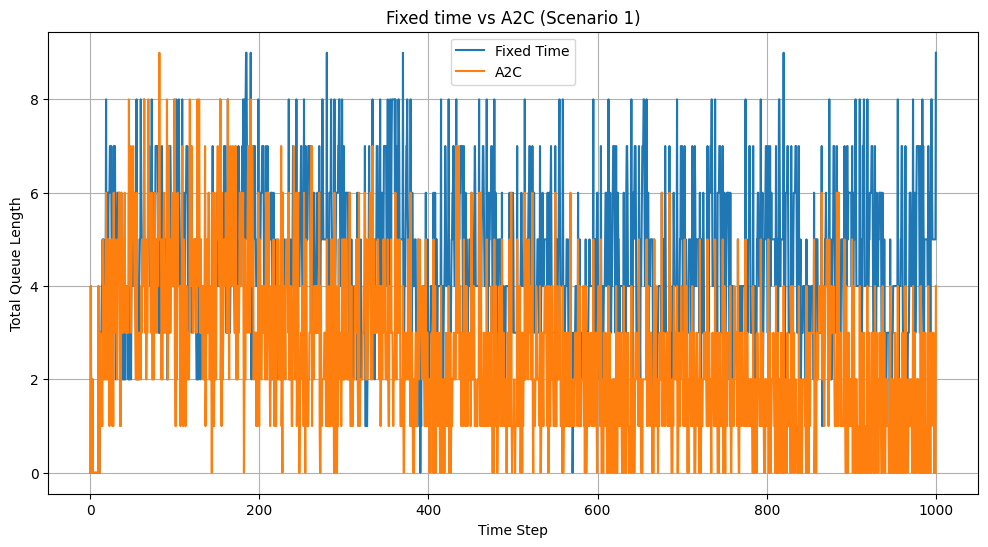

In [17]:
plt.figure(figsize=(12, 6))
data = ['Fixed Time', 'A2C']
for method in data:
    plt.plot(scen2_df["Step"], scen1_df[f"Total Queue Length ({method})"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("Fixed time vs A2C (Scenario 1)")
plt.legend()
plt.grid(True)

# Save the figure before showing it
plt.savefig("plots/a2c_vs_ft_scenario1.png", dpi=300, bbox_inches="tight")

plt.show()

### Plot Fixed Time model result for scenario 1

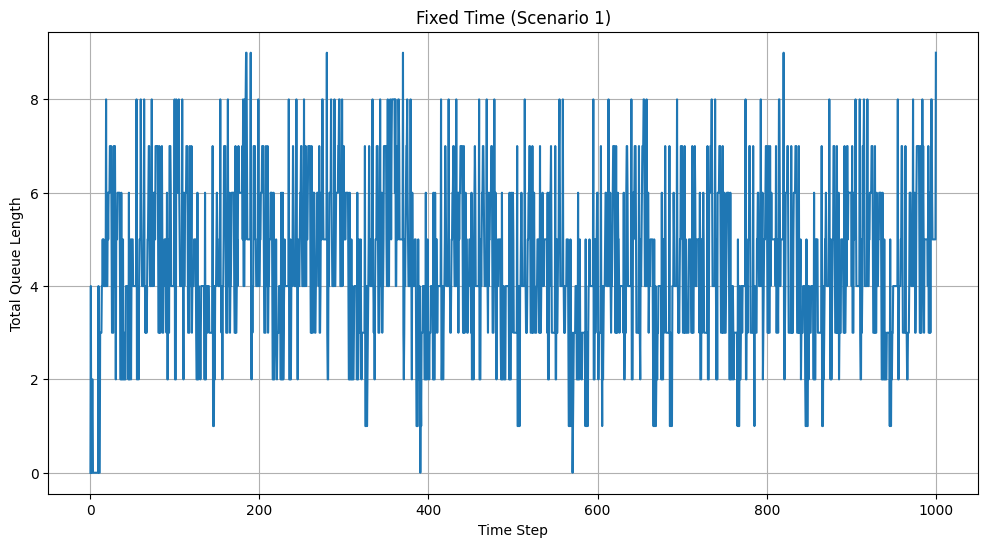

In [18]:
plt.figure(figsize=(12, 6))

plt.plot(scen1_df["Step"], scen1_df[f"Total Queue Length (Fixed Time)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("Fixed Time (Scenario 1)")
plt.grid(True)

plt.savefig("plots/ft_scenario1.png", dpi=300, bbox_inches="tight")

plt.show()

In [19]:
ft_queue_length = scen1_df[f"Total Queue Length (Fixed Time)"]
ft_peak_queue_length = ft_queue_length.max()

treshold = ft_peak_queue_length * 0.5
print (ft_peak_queue_length)
(ft_queue_length < treshold).mean() * 100

9


59.8

### Plot DQN model result for scenario 1

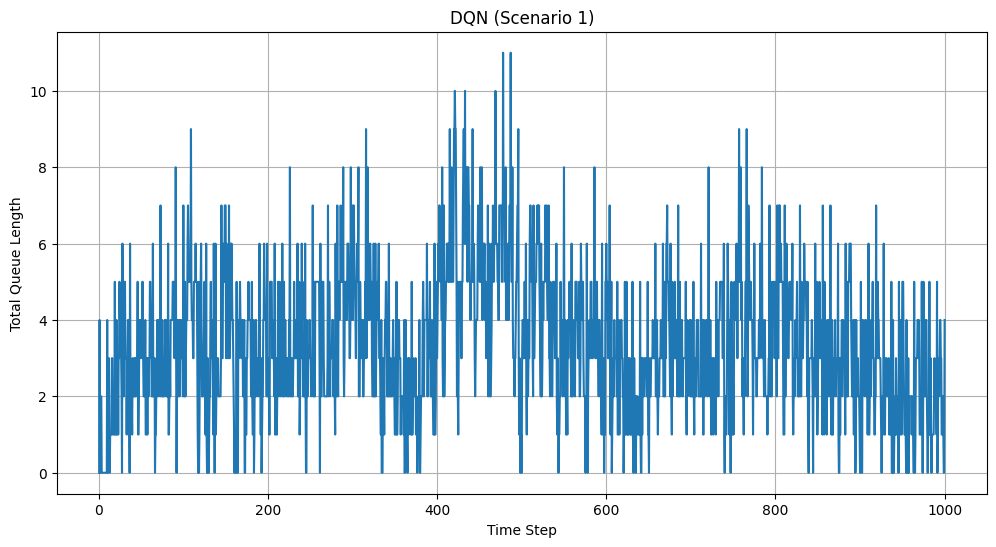

In [20]:
plt.figure(figsize=(12, 6))

plt.plot(scen1_df["Step"], scen1_df[f"Total Queue Length (DQN)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("DQN (Scenario 1)")
plt.grid(True)

plt.savefig("plots/dqn_scenario1.png", dpi=300, bbox_inches="tight")

plt.show()

In [21]:
dqn_queue_length = scen1_df[f"Total Queue Length (DQN)"]
dqn_peak_queue_length = dqn_queue_length.max()

treshold = dqn_peak_queue_length * 0.5
print(dqn_peak_queue_length)
(dqn_queue_length < treshold).mean() * 100

11


88.75

### Plot SARSA Average Queue Length for scenario 1

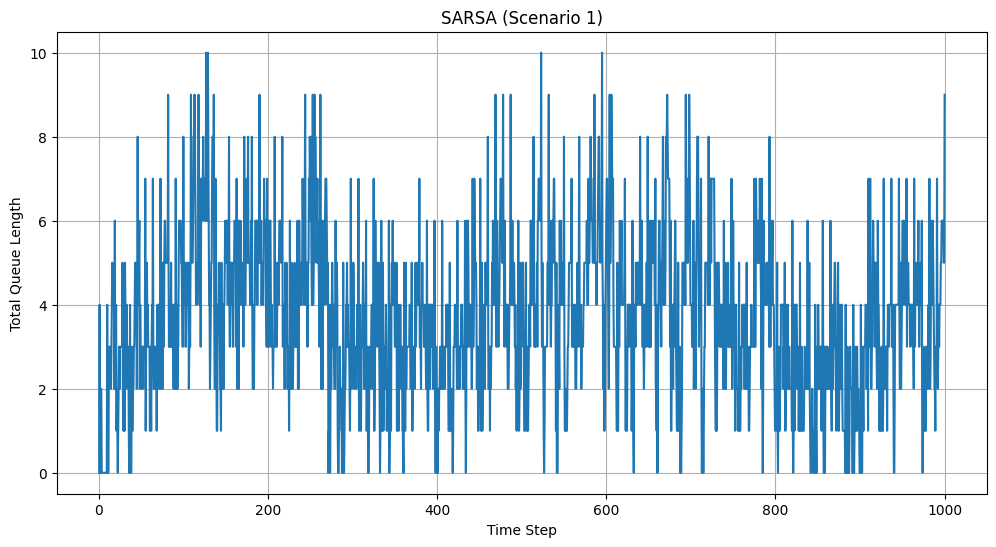

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(scen1_df["Step"], scen1_df[f"Total Queue Length (SARSA)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("SARSA (Scenario 1)")
plt.grid(True)

plt.savefig("plots/sarsa_scenario1.png", dpi=300, bbox_inches="tight")

plt.show()

In [23]:
sarsa_queue_length = scen1_df[f"Total Queue Length (SARSA)"]
sarsa_peak_queue_length = sarsa_queue_length.max()

treshold = sarsa_peak_queue_length * 0.5
print(sarsa_peak_queue_length)
(sarsa_queue_length < treshold).mean() * 100

10


70.19999999999999

### Plot A2C model result for scenario 1

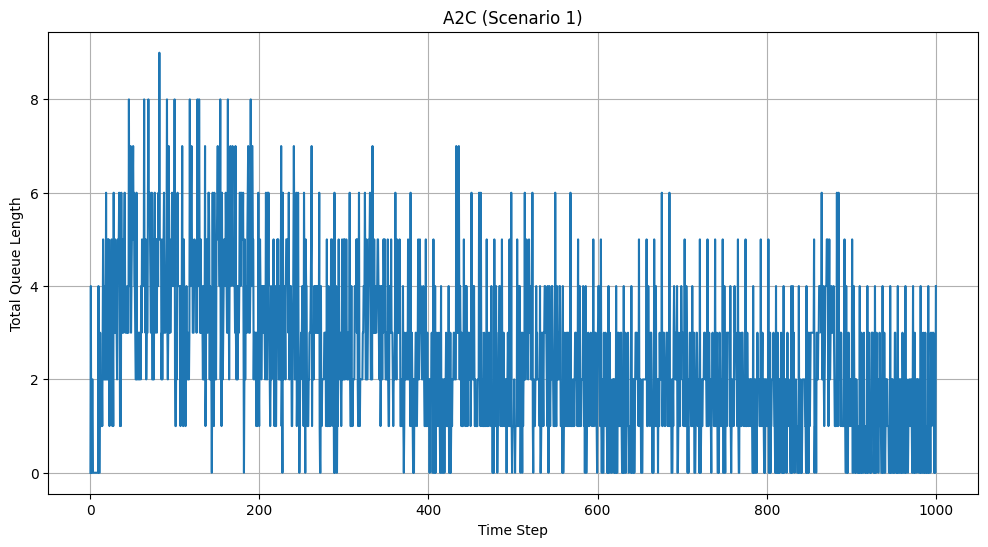

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(scen1_df["Step"], scen1_df[f"Total Queue Length (A2C)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("A2C (Scenario 1)")
plt.grid(True)

plt.savefig("plots/a2c_scenario1.png", dpi=300, bbox_inches="tight")

plt.show()

In [25]:
a2c_queue_length = scen1_df[f"Total Queue Length (A2C)"]
a2c_peak_queue_length = a2c_queue_length.max()

treshold = a2c_peak_queue_length * 0.5
print(a2c_peak_queue_length)
(a2c_queue_length < treshold).mean() * 100

9


88.4

## Plot data for Scenario 2

### Plot all model results together

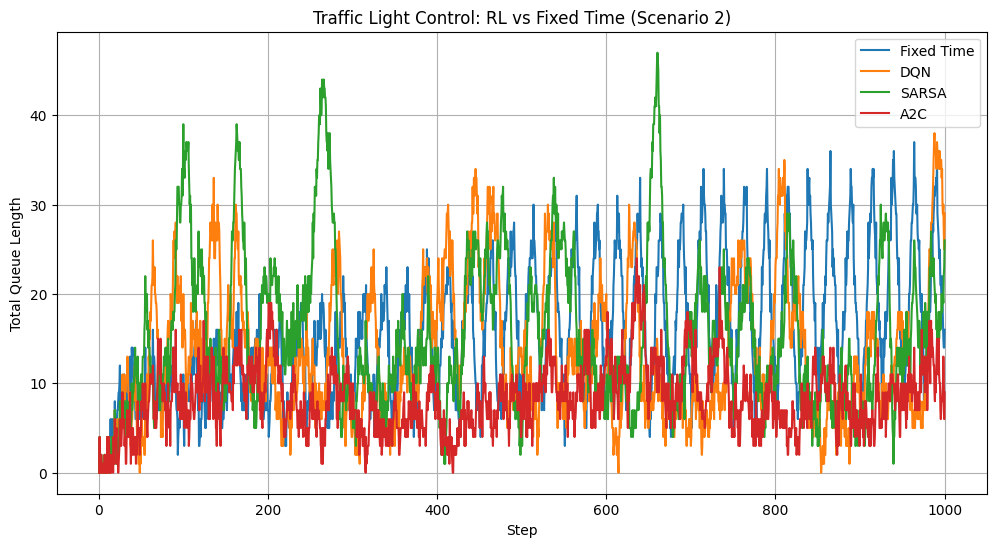

In [26]:
plt.figure(figsize=(12, 6))
for method in method_names:
    plt.plot(scen2_df["Step"], scen2_df[f"Total Queue Length ({method})"], label=method)

plt.xlabel("Step")
plt.ylabel("Total Queue Length")
plt.title("Traffic Light Control: RL vs Fixed Time (Scenario 2)")
plt.legend()
plt.grid(True)
plt.show()

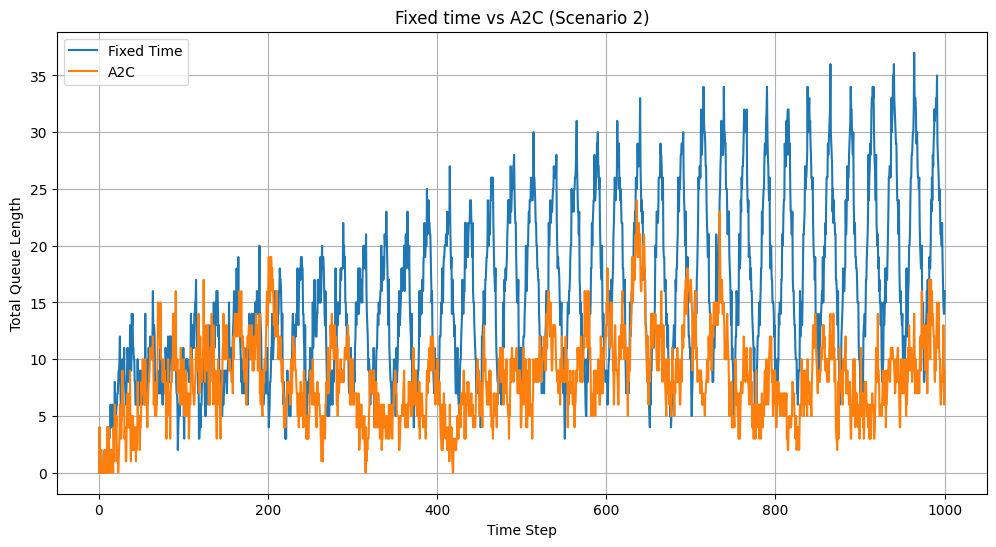

In [27]:
plt.figure(figsize=(12, 6))
data = ['Fixed Time', 'A2C']
for method in data:
    plt.plot(scen2_df["Step"], scen2_df[f"Total Queue Length ({method})"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("Fixed time vs A2C (Scenario 2)")
plt.legend()
plt.grid(True)

# Save the figure before showing it
plt.savefig("plots/a2c_vs_ft_scenario2.png", dpi=300, bbox_inches="tight")

plt.show()

### Plot Fixed Time model result for scenario 2

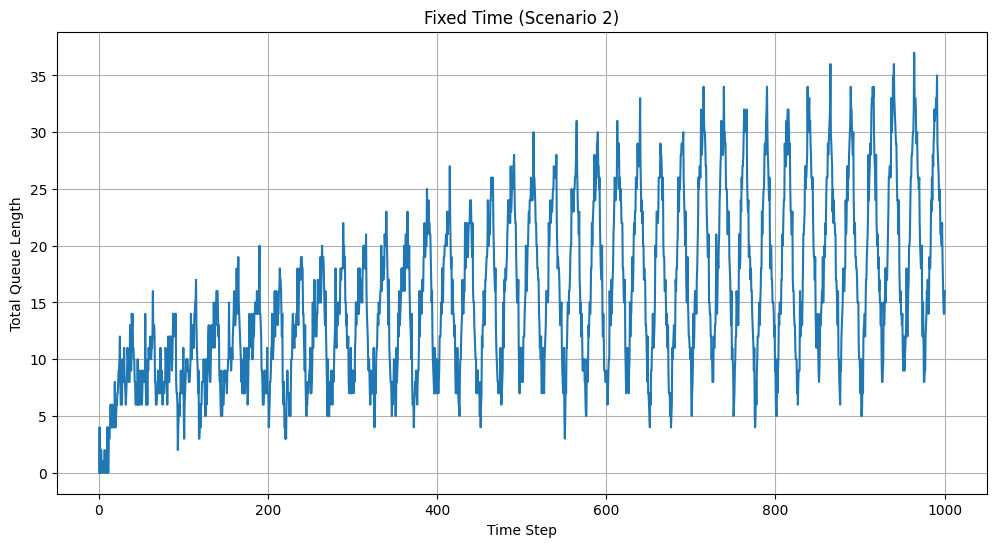

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(scen2_df["Step"], scen2_df[f"Total Queue Length (Fixed Time)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("Fixed Time (Scenario 2)")
plt.grid(True)

plt.savefig("plots/ft_scenario2.png", dpi=300, bbox_inches="tight")

plt.show()

In [29]:
ft_queue_length = scen2_df[f"Total Queue Length (Fixed Time)"]
ft_peak_queue_length = ft_queue_length.max()

treshold = ft_peak_queue_length * 0.5
print(ft_peak_queue_length)
(ft_queue_length < treshold).mean() * 100

37


68.25

### Plot Fixed DQN model result for scenario 2

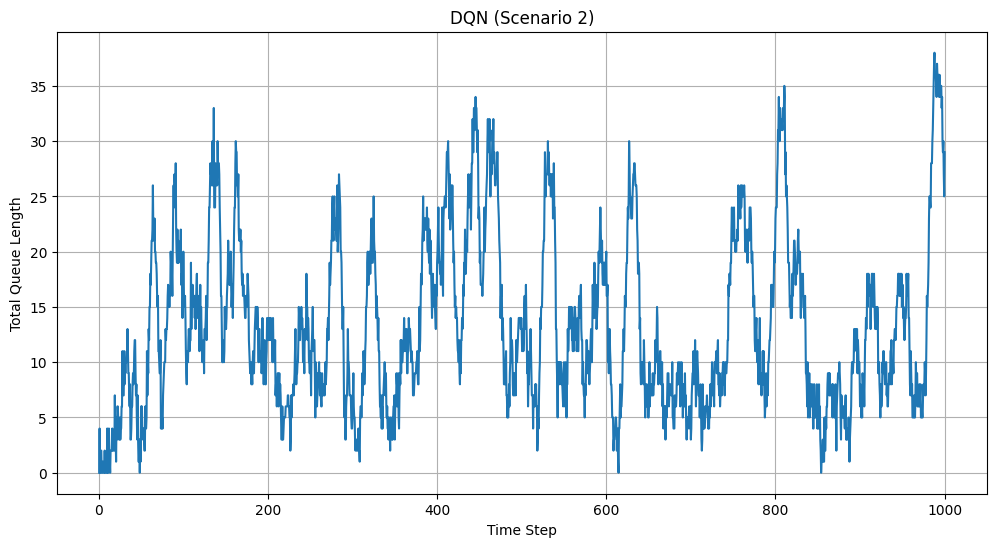

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(scen2_df["Step"], scen2_df[f"Total Queue Length (DQN)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("DQN (Scenario 2)")
plt.grid(True)

plt.savefig("plots/dqn_scenario2.png", dpi=300, bbox_inches="tight")

plt.show()

In [31]:
dqn_queue_length = scen2_df[f"Total Queue Length (DQN)"]
dqn_peak_queue_length = dqn_queue_length.max()

treshold = dqn_peak_queue_length * 0.5
print(dqn_peak_queue_length)
(dqn_queue_length < treshold).mean() * 100

38


75.8

### Plot Fixed SARSA model result for scenario 2

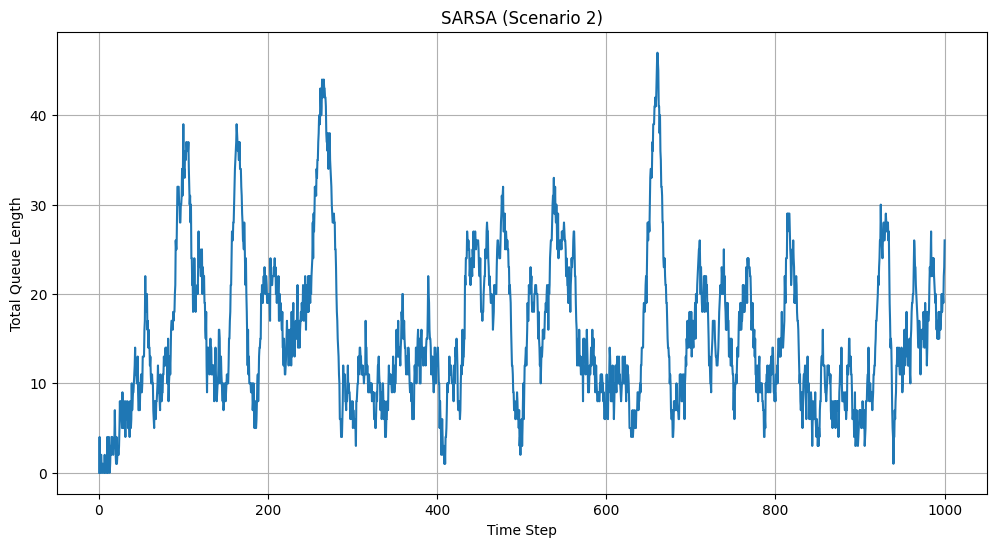

In [32]:
plt.figure(figsize=(12, 6))

plt.plot(scen2_df["Step"], scen2_df[f"Total Queue Length (SARSA)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("SARSA (Scenario 2)")
plt.grid(True)

plt.savefig("plots/sarsa_scenario2.png", dpi=300, bbox_inches="tight")

plt.show()

In [33]:
sarsa_queue_length = scen2_df[f"Total Queue Length (SARSA)"]
sarsa_peak_queue_length = sarsa_queue_length.max()

treshold = sarsa_peak_queue_length * 0.5
print(sarsa_peak_queue_length)
(sarsa_queue_length < treshold).mean() * 100

47


83.1

### Plot A2C model result for scenario 2

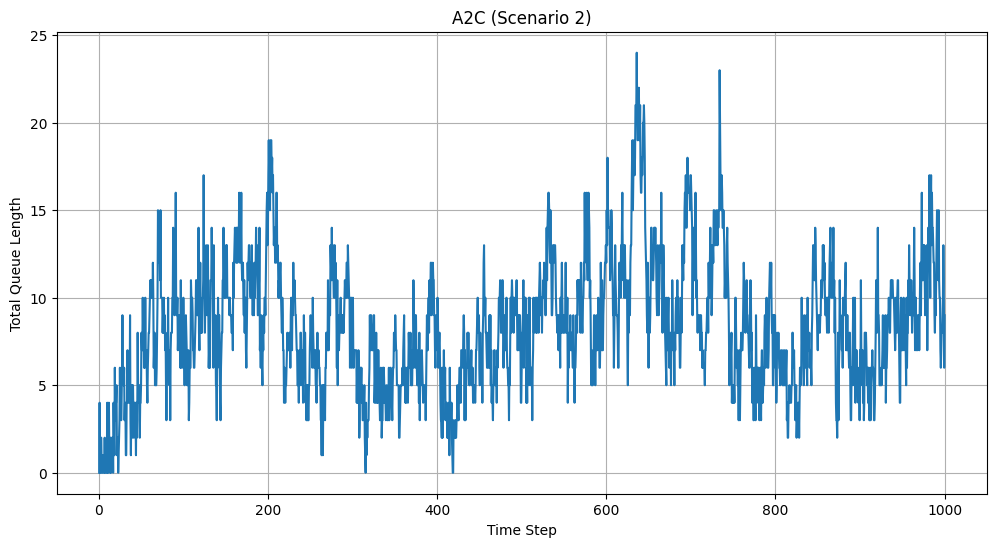

In [34]:
plt.figure(figsize=(12, 6))

plt.plot(scen2_df["Step"], scen2_df[f"Total Queue Length (A2C)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("A2C (Scenario 2)")
plt.grid(True)

plt.savefig("plots/a2c_scenario2.png", dpi=300, bbox_inches="tight")

plt.show()

In [35]:
a2c_queue_length = scen2_df[f"Total Queue Length (A2C)"]
a2c_peak_queue_length = a2c_queue_length.max()

treshold = a2c_peak_queue_length * 0.5
print(a2c_peak_queue_length)
(a2c_queue_length < treshold).mean() * 100

24


82.89999999999999

## Plot Data for Scenario 3

### Plot all models together

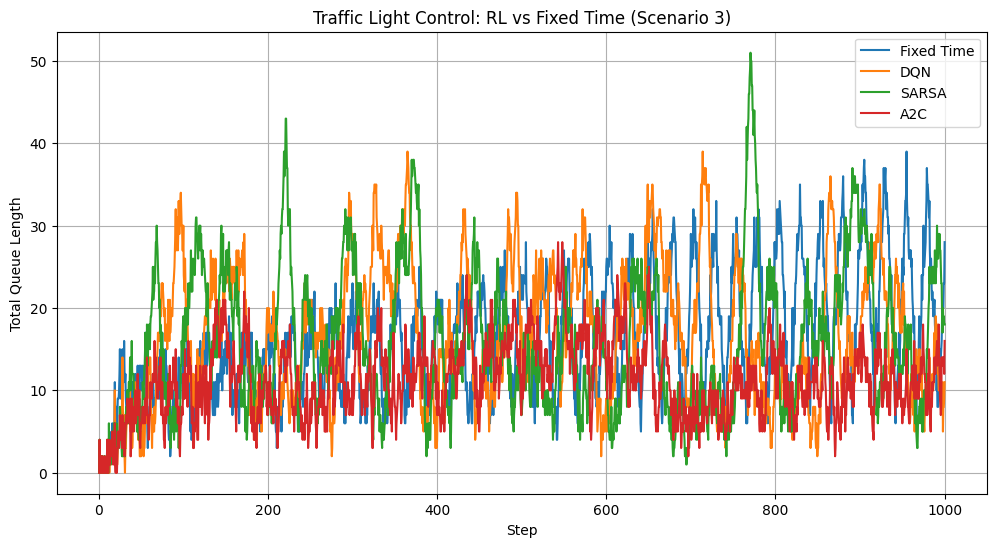

In [36]:
plt.figure(figsize=(12, 6))
for method in method_names:
    plt.plot(scen3_df["Step"], scen3_df[f"Total Queue Length ({method})"], label=method)

plt.xlabel("Step")
plt.ylabel("Total Queue Length")
plt.title("Traffic Light Control: RL vs Fixed Time (Scenario 3)")
plt.legend()
plt.grid(True)
plt.show()

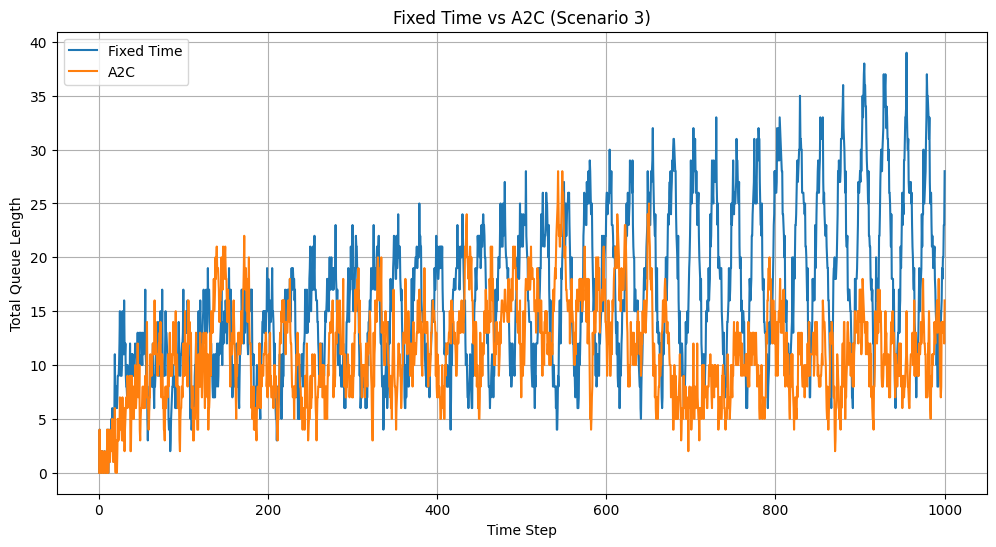

In [37]:
plt.figure(figsize=(12, 6))
data = ['Fixed Time', 'A2C']
for method in data:
    plt.plot(scen3_df["Step"], scen3_df[f"Total Queue Length ({method})"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("Fixed Time vs A2C (Scenario 3)")
plt.legend()
plt.grid(True)

plt.savefig("plots/a2c_vs_ft_scenario3.png", dpi=300, bbox_inches="tight")

plt.show()

### Plot Fixed Time model result for scenario 3

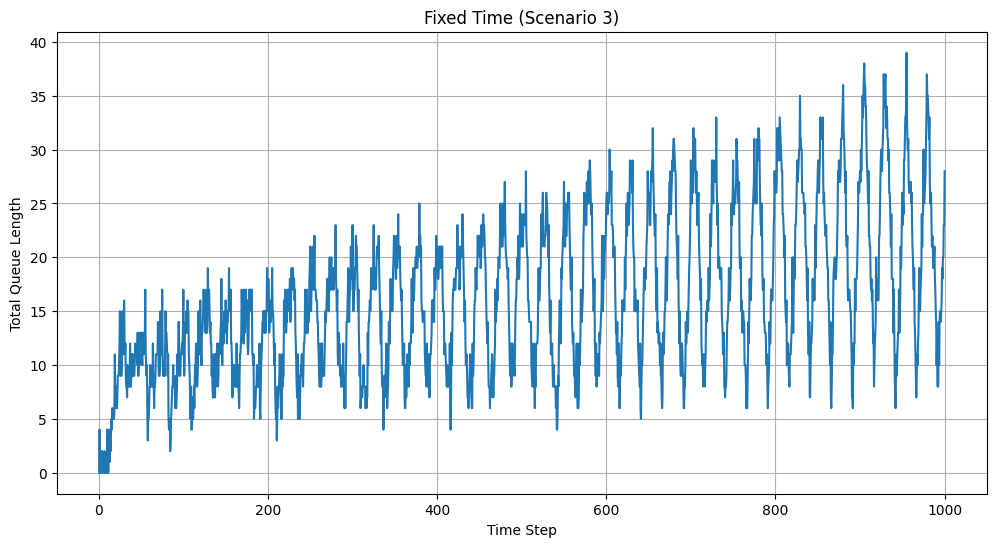

In [38]:
plt.figure(figsize=(12, 6))

plt.plot(scen3_df["Step"], scen3_df[f"Total Queue Length (Fixed Time)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("Fixed Time (Scenario 3)")
plt.grid(True)

plt.savefig("plots/ft_scenario3.png", dpi=300, bbox_inches="tight")

plt.show()

In [39]:
ft_queue_length = scen3_df[f"Total Queue Length (Fixed Time)"]
ft_peak_queue_length = ft_queue_length.max()

treshold = ft_peak_queue_length * 0.5
print(ft_peak_queue_length)
(ft_queue_length < treshold).mean() * 100

39


69.5

### Plot DQN model result for scenario 3

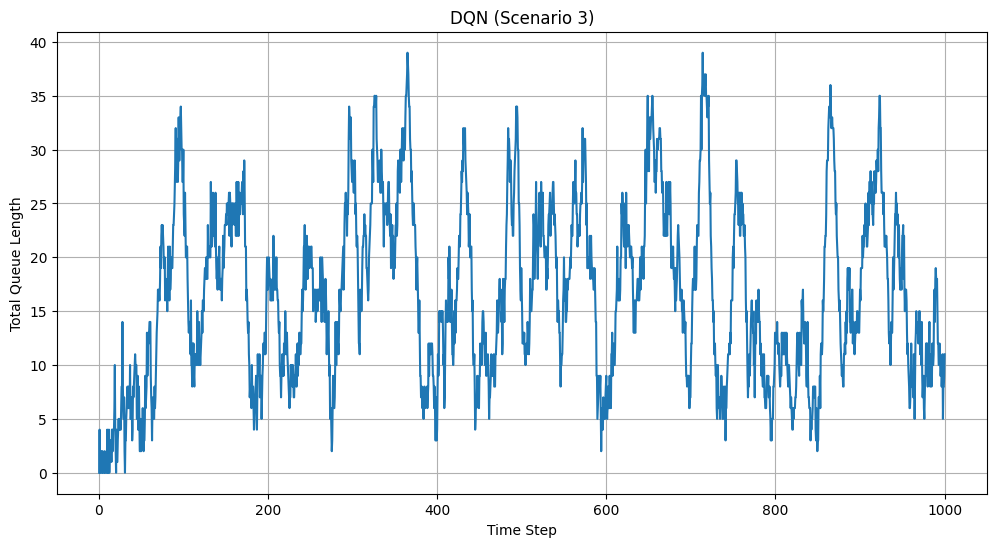

In [40]:
plt.figure(figsize=(12, 6))

plt.plot(scen3_df["Step"], scen3_df[f"Total Queue Length (DQN)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("DQN (Scenario 3)")
plt.grid(True)

plt.savefig("plots/dqn_scenario3.png", dpi=300, bbox_inches="tight")

plt.show()

In [41]:
dqn_queue_length = scen3_df[f"Total Queue Length (DQN)"]
dqn_peak_queue_length = dqn_queue_length.max()

treshold = dqn_peak_queue_length * 0.5
print(dqn_peak_queue_length)
(dqn_queue_length < treshold).mean() * 100

39


62.9

### Plot SARSA model result for scenario 3

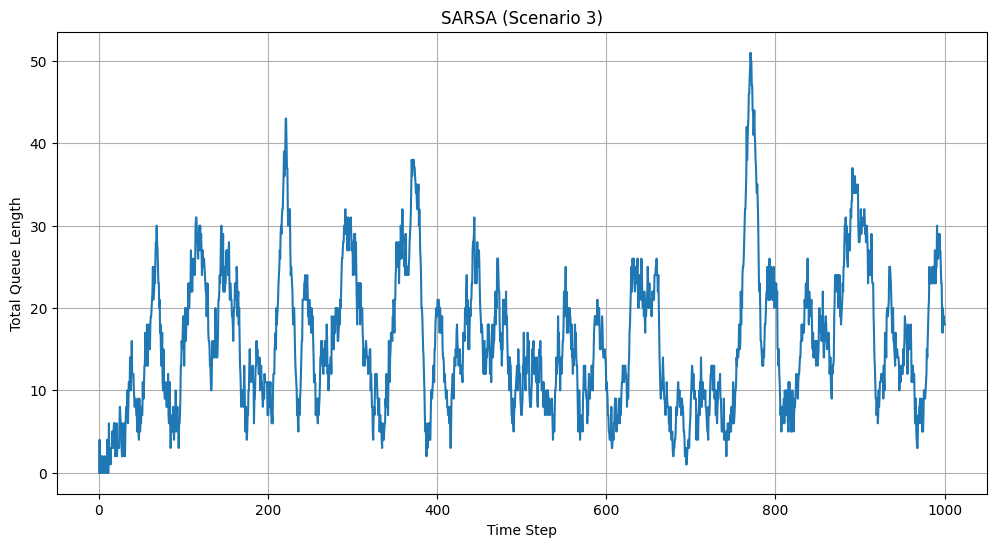

In [42]:
plt.figure(figsize=(12, 6))

plt.plot(scen3_df["Step"], scen3_df[f"Total Queue Length (SARSA)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("SARSA (Scenario 3)")
plt.grid(True)

plt.savefig("plots/sarsa_scenario3.png", dpi=300, bbox_inches="tight")

plt.show()

In [43]:
sarsa_queue_length = scen3_df[f"Total Queue Length (SARSA)"]
sarsa_peak_queue_length = sarsa_queue_length.max()

treshold = sarsa_peak_queue_length * 0.5
print(sarsa_peak_queue_length)
(sarsa_queue_length < treshold).mean() * 100

51


86.6

### Plot A2C model result for scenario 3

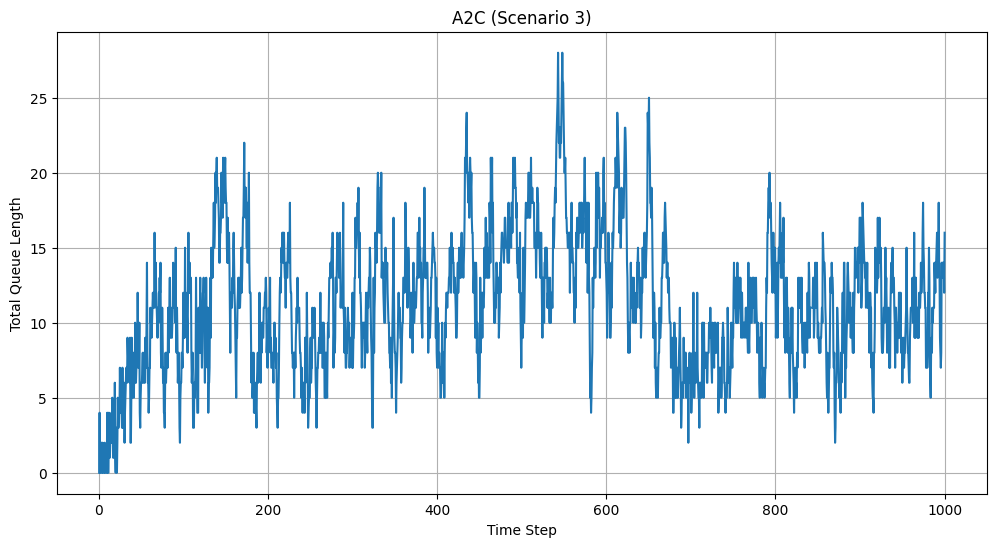

In [44]:
plt.figure(figsize=(12, 6))

plt.plot(scen3_df["Step"], scen3_df[f"Total Queue Length (A2C)"], label=method)

plt.xlabel("Time Step")
plt.ylabel("Total Queue Length")
plt.title("A2C (Scenario 3)")
plt.grid(True)

plt.savefig("plots/a2c_scenario3.png", dpi=300, bbox_inches="tight")

plt.show()

In [45]:
a2c_queue_length = scen3_df[f"Total Queue Length (A2C)"]
a2c_peak_queue_length = a2c_queue_length.max()

treshold = a2c_peak_queue_length * 0.5
print(a2c_peak_queue_length)
(a2c_queue_length < treshold).mean() * 100

28


70.55

## Get the % Performance of each model compared to Fixed Time model

### Scenario 1

In [46]:
scen1_df.describe()

,Avg Queue Length (Fixed Time),Step,Total Queue Length (Fixed Time),Avg Queue Length (DQN),Total Queue Length (DQN),Avg Queue Length (SARSA),Total Queue Length (SARSA),Avg Queue Length (A2C),Total Queue Length (A2C)
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.107550,500.250000,4.302000,0.08190,3.276000,0.090600,3.624000,0.058675,2.347000
std,0.042992,288.747294,1.719673,0.04621,1.848386,0.048026,1.921059,0.042212,1.688495
min,0.000000,0.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.075000,250.375000,3.000000,0.05000,2.000000,0.050000,2.000000,0.025000,1.000000
50%,0.100000,500.250000,4.000000,0.07500,3.000000,0.100000,4.000000,0.050000,2.000000
75%,0.125000,750.125000,5.000000,0.12500,5.000000,0.125000,5.000000,0.075000,3.000000
max,0.225000,1000.000000,9.000000,0.27500,11.000000,0.250000,10.000000,0.225000,9.000000


In [47]:
ft_mean1 = scen1_df['Total Queue Length (Fixed Time)'].mean()
dqn_mean1 = scen1_df['Total Queue Length (DQN)'].mean()
sarsa_mean1 = scen1_df['Total Queue Length (SARSA)'].mean()
a2c_mean1 = scen1_df['Total Queue Length (A2C)'].mean()

In [48]:
(ft_mean1 - a2c_mean1)/ft_mean1

0.4544397954439795

In [49]:
scen2_df.describe()

,Avg Queue Length (Fixed Time),Step,Total Queue Length (Fixed Time),Avg Queue Length (DQN),Total Queue Length (DQN),Avg Queue Length (SARSA),Total Queue Length (SARSA),Avg Queue Length (A2C),Total Queue Length (A2C)
count,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.385425,500.250000,15.4170,0.331313,13.252500,0.385837,15.433500,0.207125,8.285000
std,0.187995,288.747294,7.5198,0.192984,7.719361,0.212142,8.485669,0.092262,3.690472
min,0.000000,0.500000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225000,250.375000,9.0000,0.175000,7.000000,0.225000,9.000000,0.150000,6.000000
50%,0.350000,500.250000,14.0000,0.287500,11.500000,0.350000,14.000000,0.200000,8.000000
75%,0.525000,750.125000,21.0000,0.450000,18.000000,0.525000,21.000000,0.250000,10.000000
max,0.925000,1000.000000,37.0000,0.950000,38.000000,1.175000,47.000000,0.600000,24.000000


In [50]:
ft_mean2 = scen2_df['Total Queue Length (Fixed Time)'].mean()
dqn_mean2 = scen2_df['Total Queue Length (DQN)'].mean()
sarsa_mean2 = scen2_df['Total Queue Length (SARSA)'].mean()
a2c_mean2 = scen2_df['Total Queue Length (A2C)'].mean()

In [51]:
(ft_mean2 - a2c_mean2)/ft_mean2

0.462606213919699

In [52]:
scen3_df.describe()

,Avg Queue Length (Fixed Time),Step,Total Queue Length (Fixed Time),Avg Queue Length (DQN),Total Queue Length (DQN),Avg Queue Length (SARSA),Total Queue Length (SARSA),Avg Queue Length (A2C),Total Queue Length (A2C)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.403975,500.250000,16.159000,0.416900,16.676000,0.396025,15.841000,0.280337,11.213500
std,0.182739,288.747294,7.309544,0.204638,8.185507,0.214470,8.578783,0.112833,4.513325
min,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,250.375000,10.000000,0.250000,10.000000,0.225000,9.000000,0.200000,8.000000
50%,0.375000,500.250000,15.000000,0.400000,16.000000,0.350000,14.000000,0.275000,11.000000
75%,0.525000,750.125000,21.000000,0.575000,23.000000,0.525000,21.000000,0.350000,14.000000
max,0.975000,1000.000000,39.000000,0.975000,39.000000,1.275000,51.000000,0.700000,28.000000


In [53]:
ft_mean3 = scen3_df['Total Queue Length (Fixed Time)'].mean()
dqn_mean3 = scen3_df['Total Queue Length (DQN)'].mean()
sarsa_mean3 = scen3_df['Total Queue Length (SARSA)'].mean()
a2c_mean3 = scen3_df['Total Queue Length (A2C)'].mean()

In [54]:
(ft_mean3 - a2c_mean3)/ft_mean3

0.30605235472492104